# Title: "Comparing stm models with different numbers of topics (k)"
Author: "Jaren Haber"

# Load libraries

In [135]:
install.packages(c("pacman", "BiocManager", "readtext", "tidystm"))

#devtools::install_github("mikajoh/stmprinter")
#devtools::install_github("rstudio/shiny")
#devtools::install_github("cschwem2er/stminsights")

In [136]:
# import libraries
pacman::p_load(
          devtools, 
          rsvd, 
          geometry, 
          #Rtsne, 
          broom, 
          magrittr, 
          knitr,
          zoo,
          foreign,
          ggplot2,
          plyr,
          reshape2, 
          tidyr,
          dplyr,
          tm, 
          tau, 
          tidyverse, 
          quanteda, 
          SnowballC,
          stringr,
          #readtext,
          stringi,
          igraph,
          #stminsights,
          furrr,
          wordcloud, 
          #shiny, 
          #tidystm, # not available for # 3.6.1 - how to fix?
          tidytext, # package for tidy text
          stm, # package for structural topic modeling
          #stmprinter, 
          #stminsights,
          #stmCorrViz, 
          #LDAvis, 
          kableExtra) # for awesome tables

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

wordcloud installed


# Load and preprocess data

In [3]:
# Read data
data = read.csv('/home/jovyan/work/swarm/data/charters_cleaned_filtered.csv') # filtered data (faster, more relevant)
data = data %>% 
  tidyr::drop_na(master_string, white_students, black_students, hispanic_students, asian_students, mixed_students, native_students, poor_students, poverty_district, white_district, primary, middle, high, urban, state) # drop nulls

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 


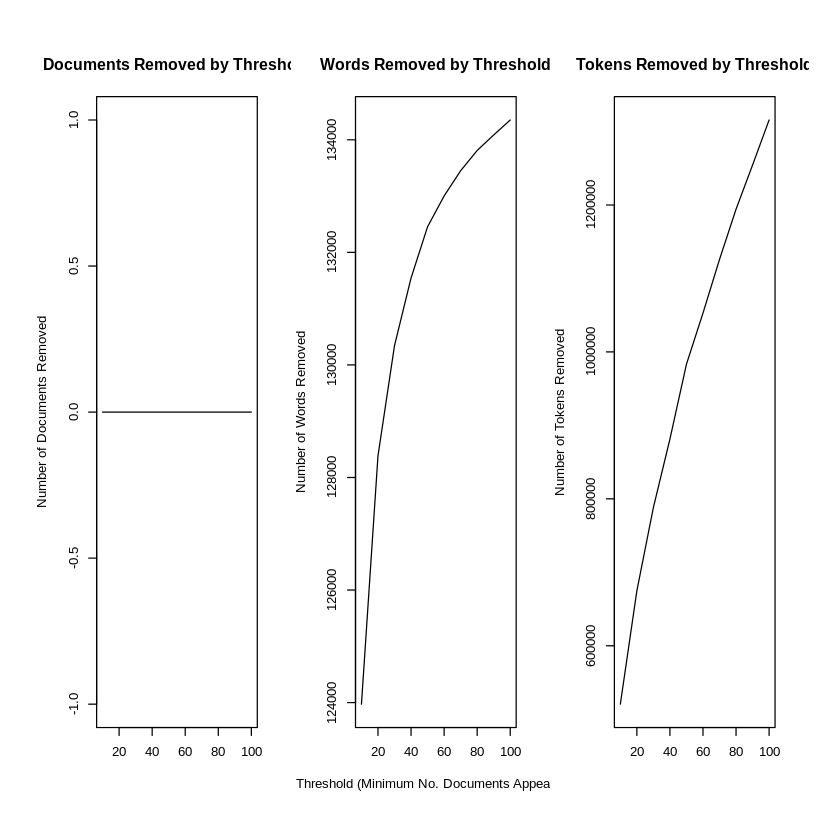

In [4]:
# Process text data/associate with metadata
processed <- textProcessor(data$master_string, metadata = data)
plotRemoved(processed$documents, lower.thresh = seq(10, 100, by = 10))

In [5]:
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh = 30) # Conservative threshold
docs <- out$documents
vocab <- out$vocab
meta <- out$meta
print("Text processing complete!")

Removing 130344 of 138104 terms (335926 of 2971948 tokens) due to frequency 
Your corpus now has 4953 documents, 7760 terms and 2636022 tokens.[1] "Text processing complete!"


# Load & Inspect Model Selection Images

## 19 topics

In [7]:
#load in the stm objects from RData file
load('/home/jovyan/work/swarm/output/stm_select19_allvars_image.RData')

In [129]:
#Display the stats from the top 4 models in charterSelect
#charterSelect

In [128]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
#plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [8]:
#save the best model to text_analysis/topic_modeling 
model19 <- charterSelect$runout[[3]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [9]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
top_words <- labelTopics(model19, n=50, frexweight = .7)
top_words

Topic 1 Top Words:
 	 Highest Prob: student, colleg, high, cours, graduat, credit, class, school, scholarship, requir, applic, year, career, univers, senior, inform, program, select, complet, click, test, grade, must, take, score, state, attend, report, offer, one, appli, academ, assign, field, websit, see, english, award, earn, work, financi, option, opportun, standard, need, transcript, prepar, aid, final, admiss 
 	 FREX: scholarship, credit, colleg, senior, cours, graduat, score, transcript, select, appear, sat, exam, window, semest, high, final, assign, aid, class, award, pathway, gpa, internship, earn, deadlin, applic, advisor, elig, gradebook, test, junior, placement, dot, univers, enter, categori, financi, click, career, fafsa, requir, take, tutor, guidanc, field, student, guid, sponsor, complet, offer 
 	 Lift: fastweb, fafsa, automot, satact, cosmetolog, dot, freshmen, scholarship, pane, gradebook, gpa, ncaa, psat, concurr, -state, apprenticeship, sophomor, plato, cahse, legi

png 
  2

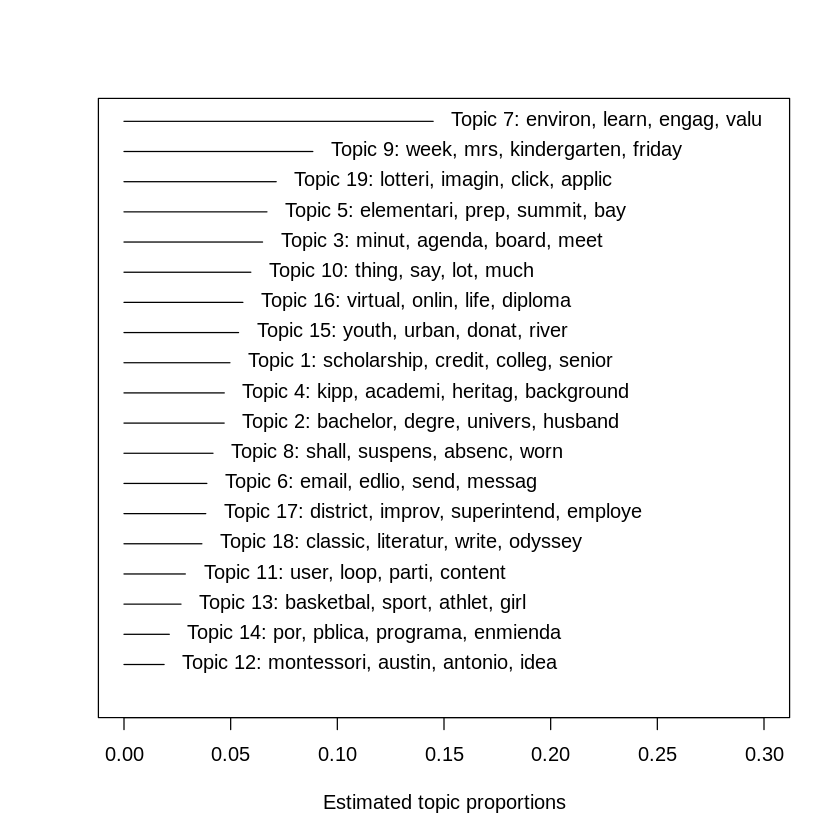

In [131]:
png(filename='/home/jovyan/work/swarm/output/top_topics_k19.png')
plot(model19, type = "summary", n = 4, xlim = c(0, 0.3), text.cex = 1, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)
dev.off()

plot(model19, type = "summary", n = 4, xlim = c(0, 0.3), text.cex = 1, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)

Inspecting valid thresholds via grid search. Progress:
  |======================================================================| 100%


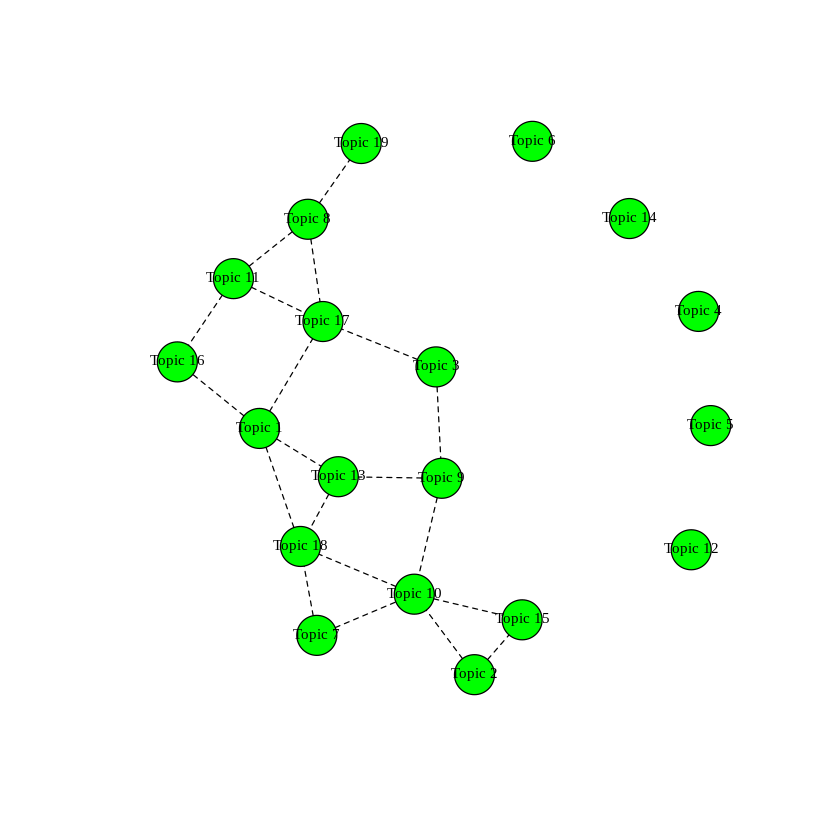

In [23]:
# Inspect topic correlations

# View this one from file:
stmCorrViz(model19, 
           file_out = '/home/jovyan/work/swarm/output/corrviz_k19.html', 
           documents_matrix = docs, 
           title = "Topic Correlations (k = 19)", 
           display = FALSE)

# This produces a visual:
corr19 = topicCorr(model19)
plot(corr19)

## 24 topics

In [10]:
#load in the stm objects from RData file
load('/home/jovyan/work/swarm/output/stm_select24_allvars_image.RData')

In [43]:
#Display the stats from the top 4 models in charterSelect
#charterSelect

In [44]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
#plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [11]:
#save the best model to text_analysis/topic_modeling 
model24 <- charterSelect$runout[[2]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [12]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
top_words <- labelTopics(model24, n=50, frexweight = .7)
top_words

Topic 1 Top Words:
 	 Highest Prob: student, colleg, cours, high, credit, class, scholarship, requir, inform, applic, graduat, senior, select, year, program, test, complet, must, univers, click, grade, score, assign, websit, take, field, report, state, career, offer, award, attend, use, communiti, option, appli, see, one, transcript, financi, standard, english, semest, includ, onlin, need, final, summer, aid, admiss 
 	 FREX: scholarship, cours, credit, senior, transcript, colleg, semest, score, select, appear, sat, exam, assign, final, aid, graduat, gpa, award, algebra, class, deadlin, window, test, gradebook, elig, elect, applic, requir, enter, option, field, junior, categori, fafsa, guidanc, placement, univers, complet, guid, financi, advisor, sponsor, descript, criteria, counselor, take, sophomor, biolog, calcul, seminar 
 	 Lift: fastweb, fafsa, satact, automot, gradebook, scholarship, pane, concurr, psat, ncaa, gpa, default, college-level, cosmetolog, column, weld, navianc, legio

png 
  2

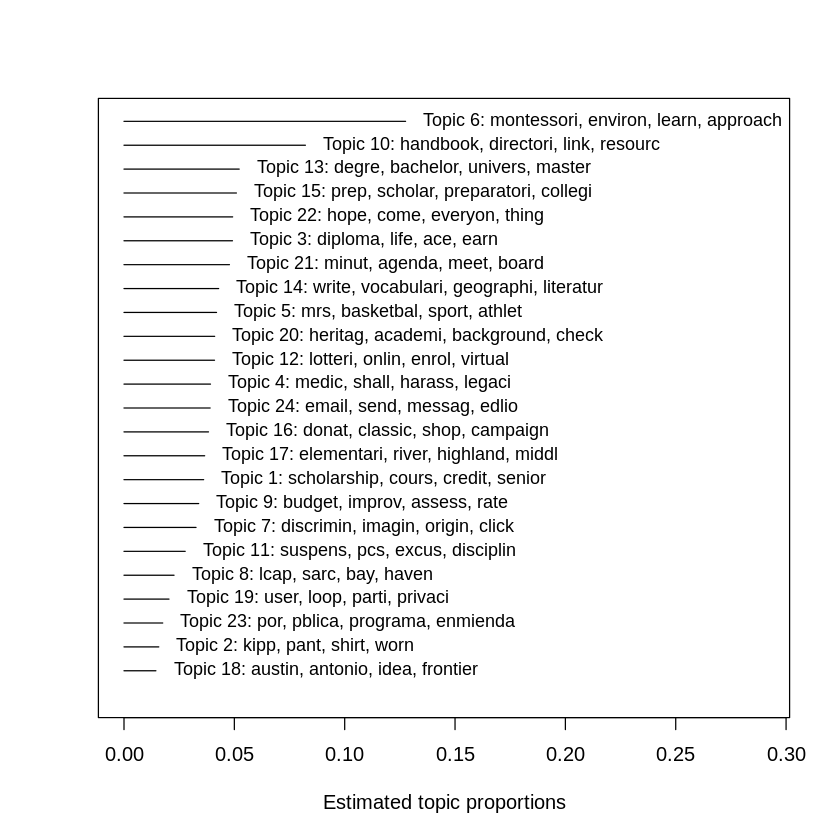

In [13]:
png(filename='/home/jovyan/work/swarm/output/top_topics_k24.png')
plot(model24, type = "summary", n = 4, xlim = c(0, 0.29), text.cex = .9, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)
dev.off()

plot(model24, type = "summary", n = 4, xlim = c(0, 0.29), text.cex = .9, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)

Inspecting valid thresholds via grid search. Progress:
  |======================================================================| 100%


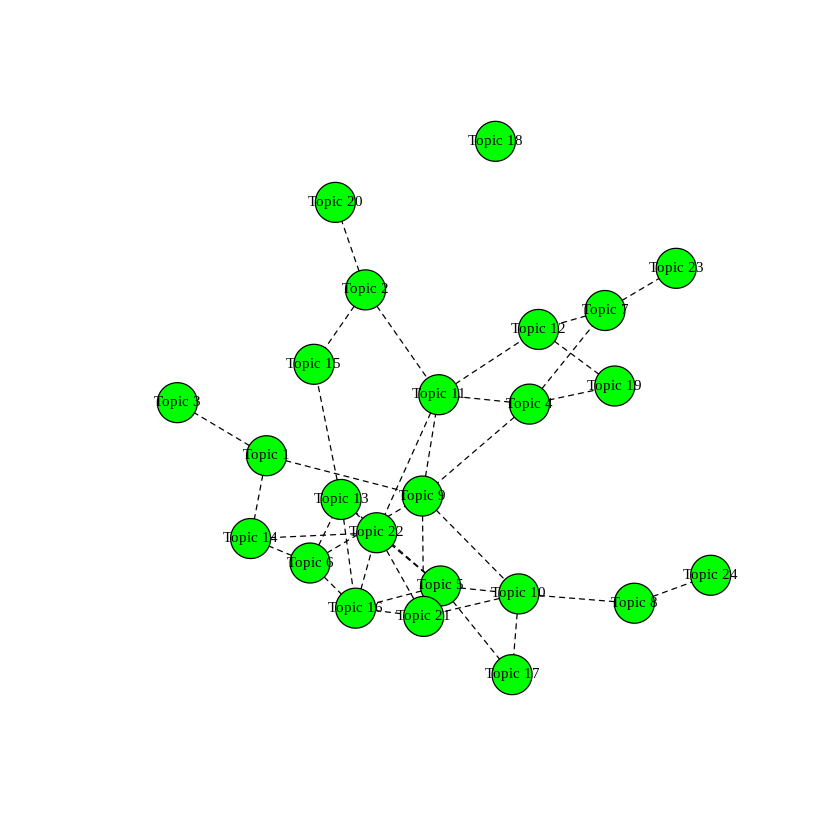

In [22]:
# Inspect topic correlations

# View this one from file:
stmCorrViz(model24, 
           file_out = '/home/jovyan/work/swarm/output/corrviz_k24.html', 
           documents_matrix = docs, 
           title = "Topic Correlations (k = 24)", 
           display = FALSE)

# This produces a visual:
corr24 = topicCorr(model24)
plot(corr24)

## 28 topics (selected)

In [4]:
#load in the stm objects from RData file
load('/home/jovyan/work/swarm/output/stm_select28_allvars_image.RData')

In [41]:
#Display the stats from the top 4 models in charterSelect
#charterSelect

In [40]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
#plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [5]:
#save the best model to text_analysis/topic_modeling 
model28 <- charterSelect$runout[[2]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [151]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
top_words <- labelTopics(model28, n=100, frexweight = .7)
top_words

Topic 1 Top Words:
 	 Highest Prob: student, cours, school, high, colleg, credit, requir, onlin, class, program, educ, inform, graduat, complet, career, test, learn, english, enrol, year, grade, offer, applic, work, take, help, studi, need, plan, parent, attend, univers, state, resourc, option, must, meet, schedul, person, provid, admiss, transcript, scienc, contact, opportun, includ, avail, semest, advanc, elect, hour, interest, appli, use, math, curriculum, earn, request, algebra, tradit, also, histori, level, languag, process, creek, academ, accredit, technic, find, access, counselor, success, subject, form, session, receiv, list, physic, technolog, independ, instruct, top, virtual, time, choic, follow, system, summer, addit, one, approv, link, unit, allow, world, experi, exam, gilbert, activ 
 	 FREX: cours, credit, transcript, semest, test, onlin, algebra, elect, requir, colleg, gilbert, english, creek, graduat, complet, offer, technic, exam, sat, advanc, take, queen, placement, h

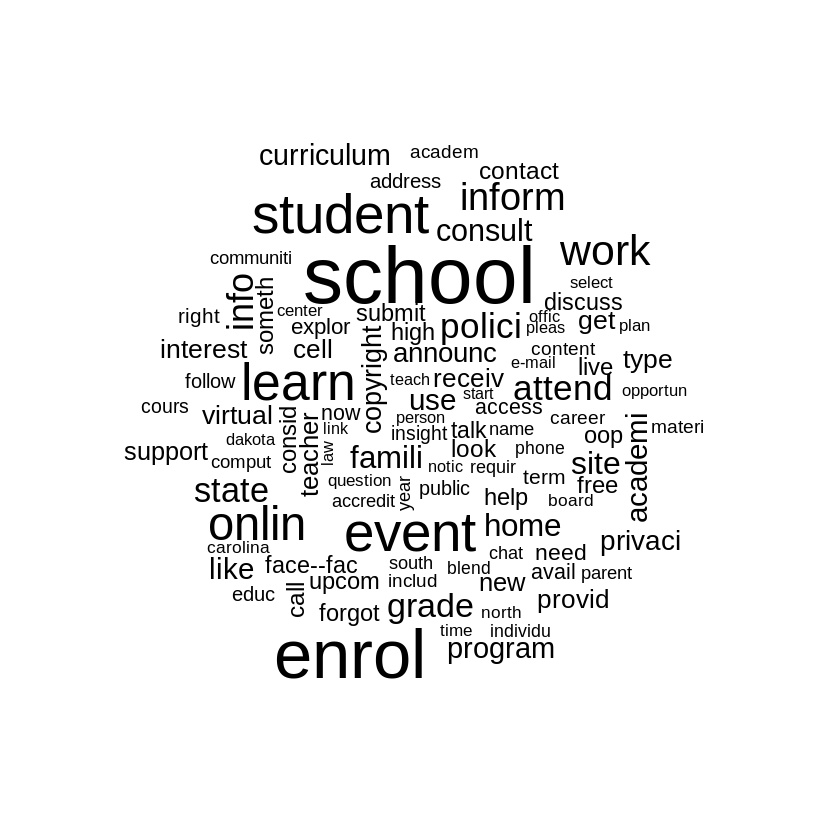

In [150]:
#png(filename='/home/jovyan/work/swarm/output/wordcloud_k28.png')
#cloud(model28)
#dev.off()

cloud(model28, 19, documents=docs, type="documents", thresh=0.5)

png 
  2

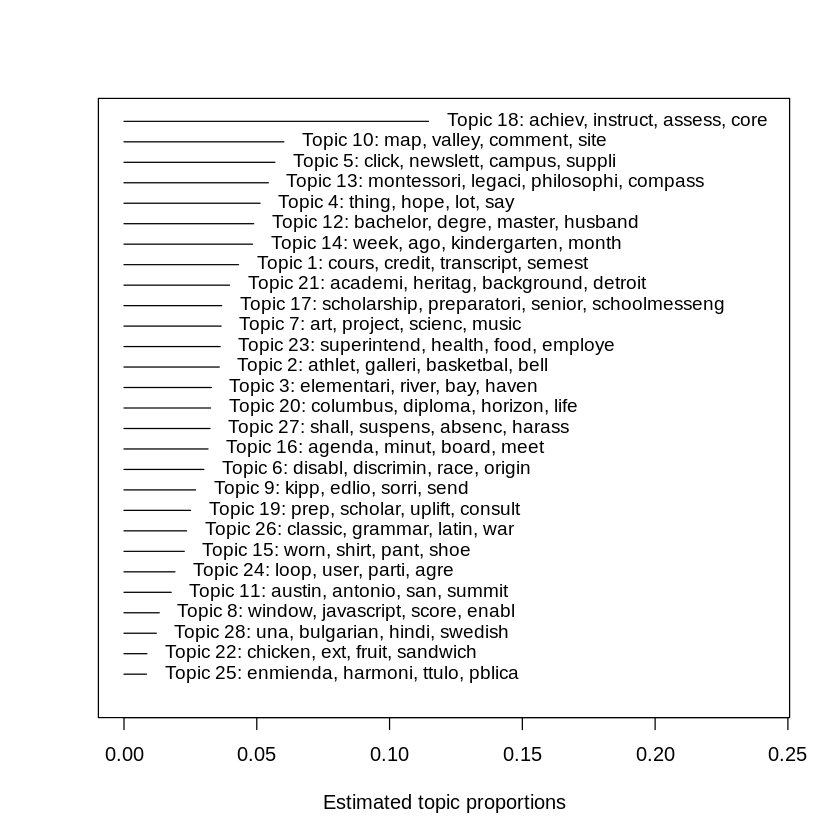

In [114]:
png(filename='/home/jovyan/work/swarm/output/top_topics_k28.png')
plot(model28, type = "summary", n = 4, xlim = c(0, 0.241), text.cex = 0.9485, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)
dev.off()

plot(model28, type = "summary", n = 4, xlim = c(0, 0.241), text.cex = 0.9485, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)

Inspecting valid thresholds via grid search. Progress:
  |======================================================================| 100%


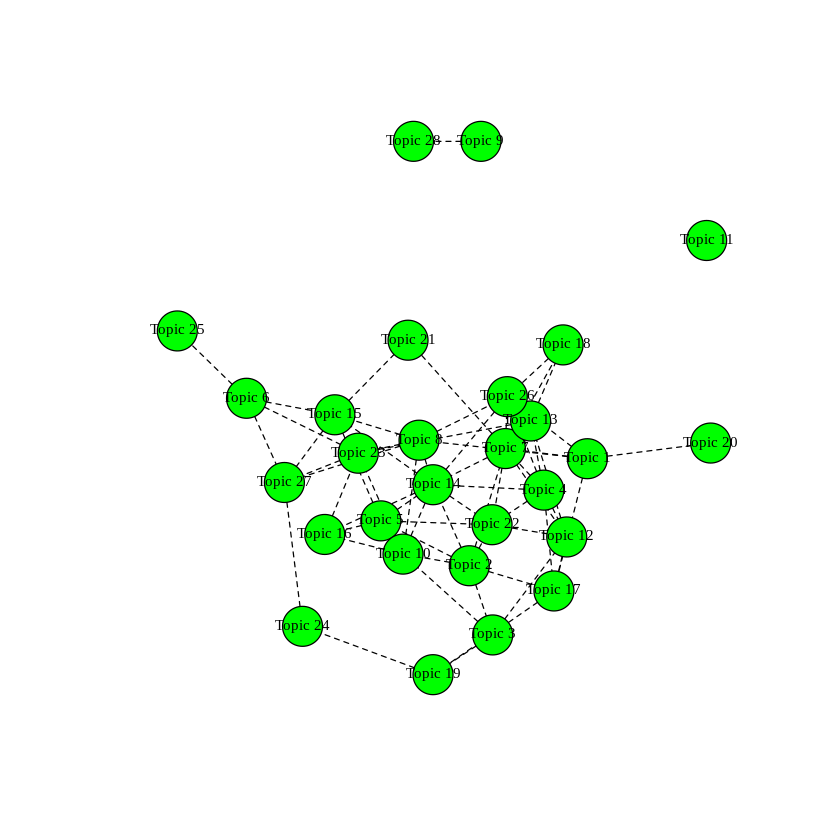

In [21]:
# Inspect topic correlations

# View this one from file:
stmCorrViz(model28, 
           file_out = '/home/jovyan/work/swarm/output/corrviz_k28.html', 
           documents_matrix = docs, 
           title = "Topic Correlations (k = 28)", 
           display = FALSE)

# This produces a visual:
corr28 = topicCorr(model28)
plot(corr28)

## Display pages exemplary of each page

In [ ]:
# find the top 3 documents that are most representative for Academics cluster topics
findThoughtsObj <- findThoughts(model, text= data$master_string, topics= c(1, 4, 7, 13, 26),n=3)

In [ ]:
# view the documents
#findThoughtsObj$docs

In [ ]:
# list of the document indices by topic
#findThoughtsObj$index

In [ ]:
# plot the document strings
plotQuote(findThoughtsObj$docs[[1]], width = 70, text.cex = 1, maxwidth = 300)

## 31 topics

In [26]:
#load in the stm objects from RData file
load('/home/jovyan/work/swarm/output/stm_select31_allvars_image.RData')

In [115]:
#Display the stats from the top 4 models in charterSelect
#charterSelect

In [116]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
#plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [27]:
#save the best model to text_analysis/topic_modeling 
model31 <- charterSelect$runout[[2]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [28]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
top_words <- labelTopics(model31, n=50, frexweight = .7)
top_words

Topic 1 Top Words:
 	 Highest Prob: write, use, read, classic, text, histori, project, word, studi, world, understand, art, topic, includ, unit, american, languag, number, stori, research, knowledg, human, cultur, music, idea, list, skill, identifi, present, discuss, new, one, first, practic, explor, concept, state, literatur, natur, problem, war, essay, describ, differ, part, follow, also, detail, grammar, life 
 	 FREX: classic, war, text, grammar, salt, latin, topic, write, word, literatur, geographi, equat, sentenc, ancient, essay, poem, poetri, vocabulari, grid, sequenc, histor, tabl, literari, fraction, narrat, earth, element, describ, graph, analyz, rhetor, medium, fiction, concept, introduct, sound, anim, spell, god, introduc, shape, explain, understand, solv, research, draw, logic, paragraph, ocean, revolut 
 	 Lift: plot, tens, theorem, atom, quadrat, linear, expon, metaphor, fabl, equat, persuas, adject, verb, geometr, punctuat, integ, speci, rhetor, poem, phrase, pollut, an

png 
  2

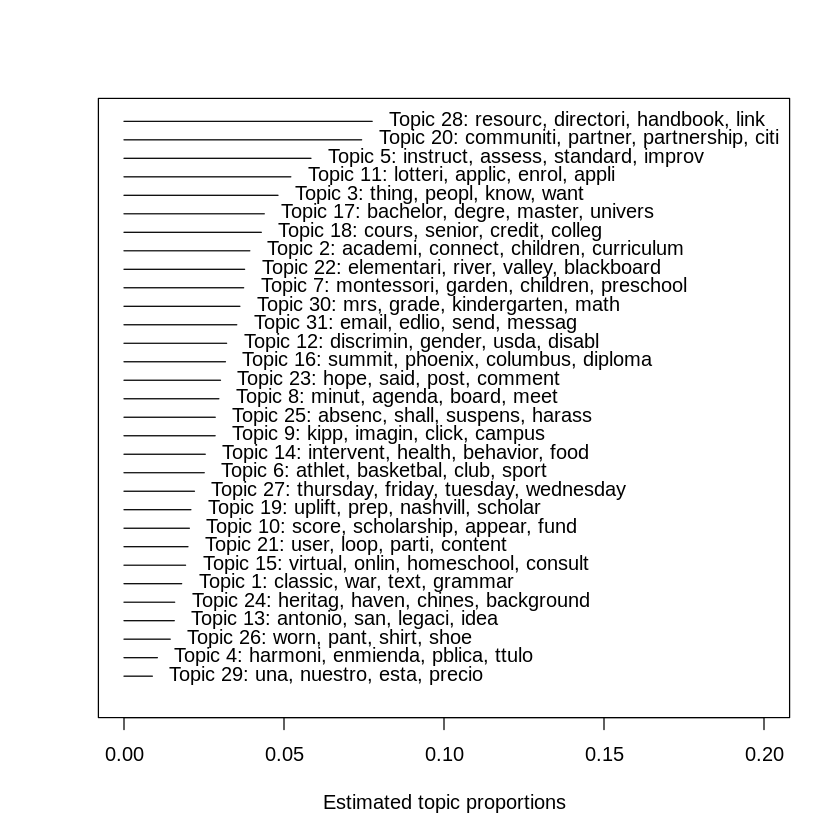

In [121]:
png(filename='/home/jovyan/work/swarm/output/top_topics_k31.png')
plot(model31, type = "summary", n = 4, xlim = c(0, 0.20), text.cex = 1, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)
dev.off()

plot(model31, type = "summary", n = 4, xlim = c(0, 0.20), text.cex = 1, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)

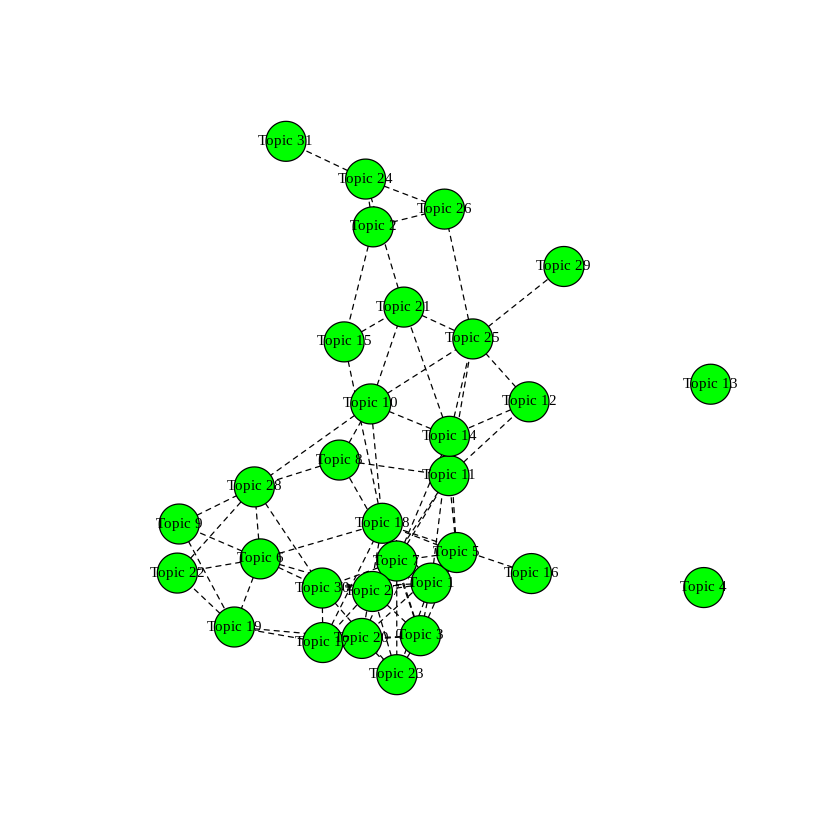

In [29]:
# Inspect topic correlations

# View this one from file:
# SHOWS ERROR: stop("Grid search failed to find a valid threshold. Try different search parameters.")
#stmCorrViz(model31, 
#           file_out = '/home/jovyan/work/swarm/output/corrviz_k31.html', 
#           documents_matrix = docs, 
#           title = "Topic Correlations (k = 31)", 
#           display = FALSE)

# This produces a visual:
corr31 = topicCorr(model31)
plot(corr31)